In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import yfinance as yf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, LSTM, Dropout
from sklearn.preprocessing import MinMaxScaler

In [2]:
stock_symbol = "AAPL"
data = yf.download(stock_symbol, start="2010-01-01", end="2023-01-01")

[*********************100%%**********************]  1 of 1 completed


In [3]:
close_prices = data['Close'].values.reshape(-1, 1)
scaler = MinMaxScaler(feature_range=(0, 1))
scaled_data = scaler.fit_transform(close_prices)

In [4]:
X_train = []
y_train = []
time_step = 60
for i in range(time_step, len(scaled_data)):
    X_train.append(scaled_data[i-time_step:i, 0])
    y_train.append(scaled_data[i, 0])

X_train, y_train = np.array(X_train), np.array(y_train)
X_train = np.reshape(X_train, (X_train.shape[0], X_train.shape[1], 1))

In [5]:
model = Sequential()
model.add(LSTM(units=50, return_sequences=True, input_shape=(X_train.shape[1], 1)))
model.add(Dropout(0.2))
model.add(LSTM(units=50))
model.add(Dropout(0.2))
model.add(Dense(units=1))

In [6]:
model.compile(optimizer='adam', loss='mean_squared_error')

In [7]:
model.fit(X_train, y_train, epochs=100, batch_size=32)

Epoch 1/100
101/101 [==============================] - 6s 30ms/step - loss: 0.0098
Epoch 2/100
101/101 [==============================] - 3s 30ms/step - loss: 0.0016
Epoch 3/100
101/101 [==============================] - 3s 30ms/step - loss: 0.0015
Epoch 4/100
101/101 [==============================] - 3s 30ms/step - loss: 0.0014
Epoch 5/100
101/101 [==============================] - 3s 30ms/step - loss: 0.0011
Epoch 6/100
101/101 [==============================] - 4s 38ms/step - loss: 0.0013
Epoch 7/100
101/101 [==============================] - 4s 35ms/step - loss: 0.0012
Epoch 8/100
101/101 [==============================] - 4s 36ms/step - loss: 0.0011
Epoch 9/100
101/101 [==============================] - 4s 35ms/step - loss: 0.0011
Epoch 10/100
101/101 [==============================] - 3s 33ms/step - loss: 0.0010
Epoch 11/100
101/101 [==============================] - 3s 33ms/step - loss: 0.0011
Epoch 12/100
101/101 [==============================] - 3s 33ms/step - loss: 0.0011
E

101/101 [==============================] - 4s 36ms/step - loss: 6.5936e-04
Epoch 95/100
101/101 [==============================] - 4s 36ms/step - loss: 5.8818e-04
Epoch 96/100
101/101 [==============================] - 4s 35ms/step - loss: 6.0526e-04
Epoch 97/100
101/101 [==============================] - 4s 35ms/step - loss: 6.4699e-04
Epoch 98/100
101/101 [==============================] - 4s 39ms/step - loss: 6.4677e-04
Epoch 99/100
101/101 [==============================] - 4s 41ms/step - loss: 5.9805e-04
Epoch 100/100
101/101 [==============================] - 4s 37ms/step - loss: 6.3255e-04


In [8]:
test_data = scaled_data[-(time_step+1):].reshape(1, -1)
X_test = []
X_test.append(test_data[0, :time_step])
X_test = np.array(X_test)
X_test = np.reshape(X_test, (X_test.shape[0], X_test.shape[1], 1))

predicted_stock_price = model.predict(X_test)
predicted_stock_price = scaler.inverse_transform(predicted_stock_price)

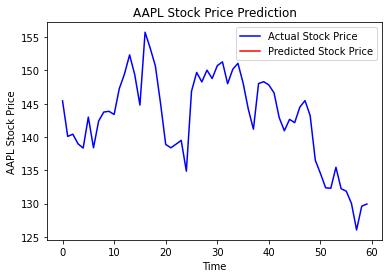

In [9]:
plt.plot(close_prices[-time_step:], color='blue', label='Actual Stock Price')
plt.plot(range(time_step-1, time_step), predicted_stock_price, color='red', label='Predicted Stock Price')
plt.title(f'{stock_symbol} Stock Price Prediction')
plt.xlabel('Time')
plt.ylabel(f'{stock_symbol} Stock Price')
plt.legend()
plt.show()

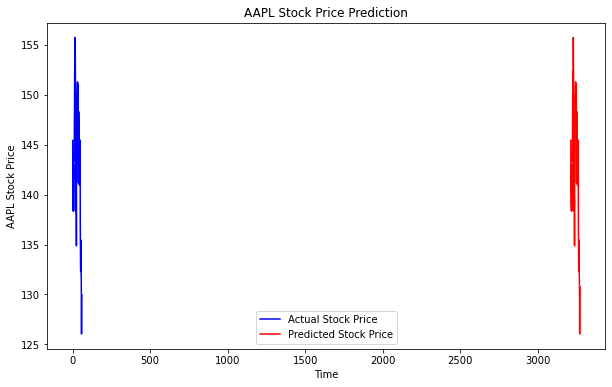

In [10]:
plt.figure(figsize=(10,6))
plt.plot(close_prices[-time_step:], color='blue', label='Actual Stock Price')
# The predicted price needs to be plotted at the right place, so we offset it to align with the last actual price
plt.plot(np.arange(len(close_prices)-time_step, len(close_prices)), np.append(close_prices[-time_step:-1], predicted_stock_price), color='red', label='Predicted Stock Price')
plt.title(f'{stock_symbol} Stock Price Prediction')
plt.xlabel('Time')
plt.ylabel(f'{stock_symbol} Stock Price')
plt.legend()
plt.show()

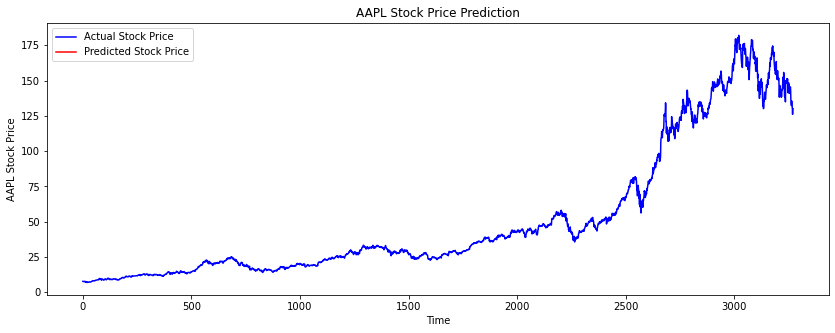

In [11]:
plt.figure(figsize=(14,5))
plt.plot(data['Close'].values, color='blue', label='Actual Stock Price')
plt.plot(range(len(data['Close']) - len(predicted_stock_price), len(data['Close'])), predicted_stock_price[:,0], color='red', label='Predicted Stock Price')
plt.title(f'{stock_symbol} Stock Price Prediction')
plt.xlabel('Time')
plt.ylabel(f'{stock_symbol} Stock Price')
plt.legend()
plt.show()

[*********************100%%**********************]  1 of 1 completed
Epoch 1/100
101/101 [==============================] - 6s 32ms/step - loss: 0.0122
Epoch 2/100
101/101 [==============================] - 3s 33ms/step - loss: 0.0016
Epoch 3/100
101/101 [==============================] - 3s 34ms/step - loss: 0.0014
Epoch 4/100
101/101 [==============================] - 3s 32ms/step - loss: 0.0015
Epoch 5/100
101/101 [==============================] - 3s 34ms/step - loss: 0.0017
Epoch 6/100
101/101 [==============================] - 3s 33ms/step - loss: 0.0012
Epoch 7/100
101/101 [==============================] - 4s 37ms/step - loss: 0.0013
Epoch 8/100
101/101 [==============================] - 4s 39ms/step - loss: 0.0012
Epoch 9/100
101/101 [==============================] - 4s 39ms/step - loss: 0.0010
Epoch 10/100
101/101 [==============================] - 4s 38ms/step - loss: 0.0012
Epoch 11/100
101/101 [==============================] - 4s 35ms/step - loss: 0.0010
Epoch 12/100
101

101/101 [==============================] - 4s 40ms/step - loss: 5.8623e-04
Epoch 95/100
101/101 [==============================] - 4s 39ms/step - loss: 5.8377e-04
Epoch 96/100
101/101 [==============================] - 4s 42ms/step - loss: 5.9784e-04
Epoch 97/100
101/101 [==============================] - 4s 40ms/step - loss: 5.9891e-04
Epoch 98/100
101/101 [==============================] - 4s 38ms/step - loss: 6.0904e-04
Epoch 99/100
101/101 [==============================] - 4s 38ms/step - loss: 6.3166e-04
Epoch 100/100
101/101 [==============================] - 4s 37ms/step - loss: 5.6607e-04


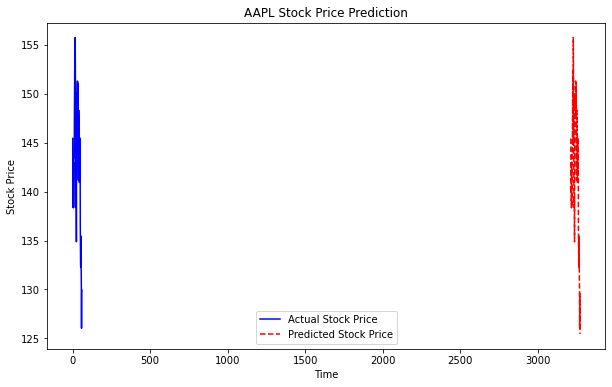

In [12]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import yfinance as yf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, LSTM, Dropout
from sklearn.preprocessing import MinMaxScaler

# Step 1: Data Collection
stock_symbol = "AAPL"
data = yf.download(stock_symbol, start="2010-01-01", end="2023-01-01")

# Step 2: Data Preprocessing
close_prices = data['Close'].values.reshape(-1, 1)
scaler = MinMaxScaler(feature_range=(0, 1))
scaled_data = scaler.fit_transform(close_prices)

# Creating a dataset with 60 timesteps and 1 output
X_train = []
y_train = []
time_step = 60
for i in range(time_step, len(scaled_data)):
    X_train.append(scaled_data[i-time_step:i, 0])
    y_train.append(scaled_data[i, 0])

X_train, y_train = np.array(X_train), np.array(y_train)
X_train = np.reshape(X_train, (X_train.shape[0], X_train.shape[1], 1))

# Step 3: Build LSTM Model
model = Sequential()
model.add(LSTM(units=50, return_sequences=True, input_shape=(X_train.shape[1], 1)))
model.add(Dropout(0.2))
model.add(LSTM(units=50))
model.add(Dropout(0.2))
model.add(Dense(units=1))

# Compiling the Model
model.compile(optimizer='adam', loss='mean_squared_error')

# Step 4: Train the Model
model.fit(X_train, y_train, epochs=100, batch_size=32)

# Step 5: Predictions and Visualization
# Prepare test data from the last part of scaled_data
test_data = scaled_data[-(time_step+1):].reshape(1, -1)
X_test = []
X_test.append(test_data[0, :time_step])
X_test = np.array(X_test)
X_test = np.reshape(X_test, (X_test.shape[0], X_test.shape[1], 1))

# Make a prediction
predicted_stock_price = model.predict(X_test)
predicted_stock_price = scaler.inverse_transform(predicted_stock_price)

# Plotting the actual and predicted prices
plt.figure(figsize=(10,6))
plt.plot(close_prices[-time_step:], color='blue', label='Actual Stock Price')
# Align the predicted price with the last actual price on the plot
plt.plot(np.arange(len(close_prices)-time_step, len(close_prices)), np.append(close_prices[-time_step:-1], predicted_stock_price), color='red', linestyle='--', label='Predicted Stock Price')
plt.title(f'{stock_symbol} Stock Price Prediction')
plt.xlabel('Time')
plt.ylabel('Stock Price')
plt.legend()
plt.show()
